In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import fixed, interact, interact_manual, interactive
from matplotlib.colors import LinearSegmentedColormap
from skimage.color import hed2rgb, rgb2hed

In [2]:
from skimage import data, filters, io, viewer

# from scipy import constants
# from PIL import Image

/opt/conda/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [3]:
img1 = io.imread("blobs.tif", plugin="tifffile")
img2 = io.imread("FluorescentCells.tif", plugin="tifffile")
img3 = io.imread("FluorescentCells (2).tif", plugin="tifffile")

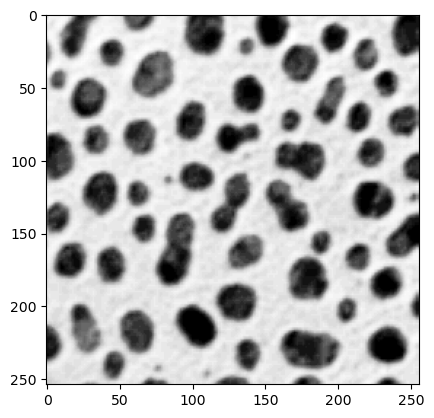

In [4]:
plt.imshow(img1, cmap="Greys")

In [5]:
img2_transpose = np.transpose(img2)
ch1 = img2_transpose[0]
ch2 = img2_transpose[1]
ch3 = img2_transpose[2]

In [6]:
red = [(0, 0, 0), (1, 0, 0)]
green = [(0, 0, 0), (0, 1, 0)]
blue = [(0, 0, 0), (0, 0, 1)]
yellow = [(0, 0, 0), (1, 1, 0)]
magenta = [(0, 0, 0), (1, 0, 1)]
cyan = [(0, 0, 0), (0, 1, 1)]
lut_red = LinearSegmentedColormap.from_list("Custom", red, N=256)
lut_green = LinearSegmentedColormap.from_list("Custom", green, N=256)
lut_blue = LinearSegmentedColormap.from_list("Custom", blue, N=256)
lut_cyan = LinearSegmentedColormap.from_list("Custom", cyan, N=256)
lut_magenta = LinearSegmentedColormap.from_list("Custom", magenta, N=256)
lut_yellow = LinearSegmentedColormap.from_list("Custom", yellow, N=256)

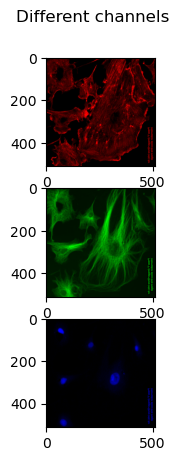

In [7]:
fig, axs = plt.subplots(3)
fig.suptitle("Different channels")
axs[0].imshow(ch1, cmap=lut_red)
axs[1].imshow(ch2, cmap=lut_green)
axs[2].imshow(ch3, cmap=lut_blue)

In [8]:
ch1_conc = np.concatenate(img2_transpose[0])
ch2_conc = np.concatenate(img2_transpose[1])
ch3_conc = np.concatenate(img2_transpose[2])

In [9]:
hist1 = np.histogram(ch1_conc, bins=255)
hist2 = np.histogram(ch2_conc, bins=255)
hist3 = np.histogram(ch3_conc, bins=255)
print(hist1[1])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

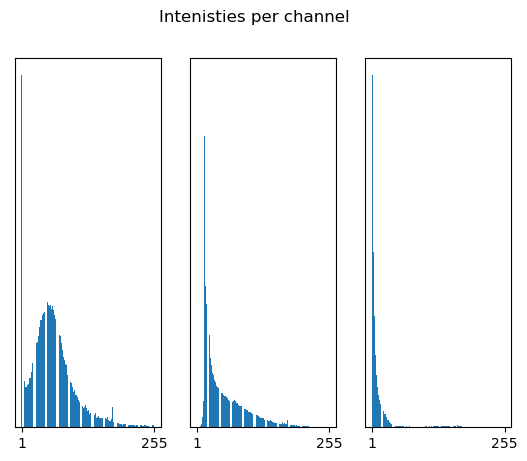

In [10]:
fig1, axs = plt.subplots(1, 3)
fig1.suptitle("Intenisties per channel")
axs[0].bar(hist1[1][1:-1], hist1[0][1:])
axs[0].set_yticks([])
axs[0].set_xticks([1, 255])

axs[1].bar(hist2[1][1:-1], hist2[0][1:])
axs[1].set_yticks([])
axs[1].set_xticks([1, 255])

axs[2].bar(hist3[1][1:-1], hist3[0][1:])
axs[2].set_yticks([])
axs[2].set_xticks([1, 255]);

## Changing brightness and contrast
For each pixel f with coordenates (i,j) the function to change brightness and contrast is 
<br /> $g(i,j)=\alpha\cdot f(i,j) + \beta$

where $\alpha$ is the gain and $\beta$ is the bias

In [20]:
def change_brightness_contrast(alpha, beta, channel):
    
    alpha, beta = float(alpha), int(beta)
    new_ch1 = alpha * channel - beta
    binwidth = 255 / (255 + abs(beta))
    
    if beta > 0:
        new_ch1[new_ch1<0]=0
        new_ch1_conc = np.concatenate(new_ch1)
        new_ch1_hist = np.histogram(new_ch1_conc, bins=np.arange(0, 255 -binwidth, binwidth))
    else:
        new_ch1[new_ch1>255]=255
        new_ch1_conc = np.concatenate(new_ch1)
        new_ch1_hist = np.histogram(new_ch1_conc, bins=np.arange(np.amin(new_ch1)- binwidth, np.amax(new_ch1) + binwidth, binwidth))
    
    fig, axs = plt.subplots(2, 2)
    axs[0][0].set_title("Original")
    axs[0][0].imshow(channel, cmap=lut_red)
    axs[0][0].set_xticks([])
    axs[0][0].set_yticks([])
    axs[0][1].set_title("Contrast and brigthness changed")
    new_red = [(-beta / 256, 0, 0), (1, 0, 0)]
    new_lut_red = LinearSegmentedColormap.from_list("Custom", new_red, N=256)
    axs[0][1].imshow(new_ch1, cmap=new_lut_red)
    axs[0][1].set_xticks([])
    axs[0][1].set_yticks([])
    axs[1][0].bar(hist1[1][1:-1], hist1[0][1:])
    axs[1][0].set_xticks([1, 255])
    axs[1][0].set_yticks([])
    axs[1][1].bar(new_ch1_hist[1][1:-1], new_ch1_hist[0][1:])
    axs[1][1].set_xticks([1, 255])
    axs[1][1].set_yticks([])

In [23]:
alpha = input("Gain:")
beta = input("Bias:")

Gain: 1
Bias: -100


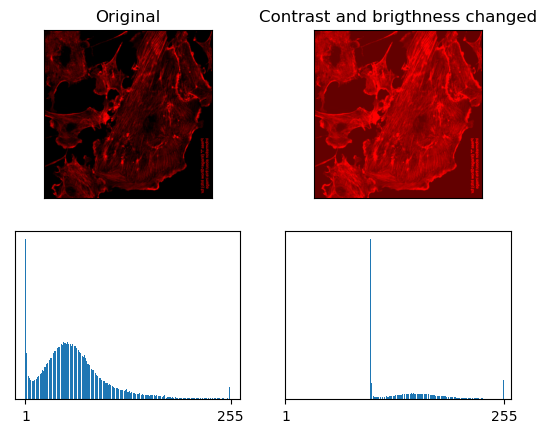

In [24]:
change_brightness_contrast(alpha, beta, ch1)